In [ ]:
from ker gyas.datasets import mnist
import numpy as np

(xtrain,ytrain),(xtest,ytest)=mnist.load_data();

xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

#normalize
xtrain=xtrain/255
xtest=xtest/255

from keras.utils import to_categorical
ytrain=to_categorical(ytrain,10)
ytest=to_categorical(ytest,10)

from keras.models import Sequential
model=Sequential();

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

#1stlayer
model.add(Conv2D(32, kernel_size=(3, 3), strides=1, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(padding='same'))

#2ndlayer
model.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))

#3rlayer
model.add(Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,201,098 (8.40 MB)

 Trainable params: 2,201,098 (8.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,batch_size=100,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 148s 242ms/step - accuracy: 0.8768 - loss: 0.3770 - val_accuracy: 0.9857 - val_loss: 0.0452
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 141s 236ms/step - accuracy: 0.9863 - loss: 0.0437 - val_accuracy: 0.9890 - val_loss: 0.0334
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 139s 232ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9884 - val_loss: 0.0313
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 144s 235ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9898 - val_loss: 0.0322
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 141s 234ms/step - accuracy: 0.9947 - loss: 0.0159 - val_accuracy: 0.9922 - val_loss: 0.0224


In [ ]:
ypredenc=model.predict(xtest)
yact=[np.argmax(i) for i in ytest]
ypred=[np.argmax(i) for i in ypredenc]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(yact,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



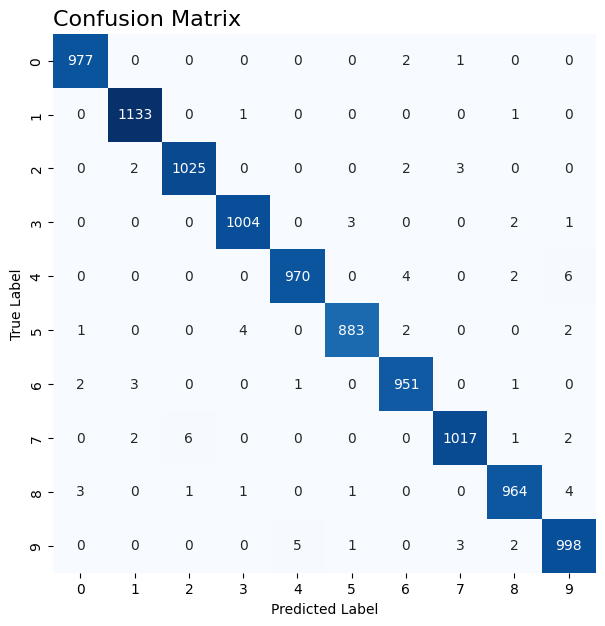

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(yact,ypred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()